<a href="https://colab.research.google.com/github/khall02/DS4-PH-2025/blob/main/hw3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Download dataset into panadas and name dataframe kirb21_df




In [3]:
kirb21_df = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")

In [4]:
kirb21_df.head(4)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519


Obtain dataset where raw id== kirby906a.ax.img




In [5]:
kirby906a_ax_df = kirb21_df.loc[(kirb21_df.rawid == "kirby906a_ax.img")]
kirby906a_ax_df

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12540,12541,kirby906a_ax.img,Telencephalon_L,467063,2.0,350.0,165.2599,57.1707,1,1,906,1195015,1123076
12541,12542,kirby906a_ax.img,Telencephalon_R,470488,2.0,337.0,171.8695,59.3001,1,1,906,1195015,1123076
12542,12543,kirby906a_ax.img,Diencephalon_L,8801,60.0,327.0,227.1878,31.2303,1,1,906,1195015,1123076
12543,12544,kirby906a_ax.img,Diencephalon_R,9054,63.0,415.0,231.6770,31.1780,1,1,906,1195015,1123076
12544,12545,kirby906a_ax.img,Mesencephalon,9564,86.0,352.0,269.1003,28.6454,1,1,906,1195015,1123076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13371,13372,kirby906a_ax.img,Caudate_tail_L,424,112.0,279.0,182.8215,31.9975,2,5,906,1195015,1123076
13372,13373,kirby906a_ax.img,Caudate_tail_R,386,83.0,286.0,186.3707,37.6639,2,5,906,1195015,1123076
13373,13374,kirby906a_ax.img,Chroid_LVetc_L,101,56.0,255.0,181.6190,39.8132,2,5,906,1195015,1123076
13374,13375,kirby906a_ax.img,Chroid_LVetc_R,84,53.0,271.0,181.9857,43.3901,2,5,906,1195015,1123076


Calculate the subject's volume of their type 1 level 1 telencephalon

In [6]:
#Tel volume Left
telencephalon_L_volume = kirby906a_ax_df.loc[(kirby906a_ax_df.type==1) & (kirby906a_ax_df.level==1) & (kirby906a_ax_df.roi== "Telencephalon_L"), 'volume'].sum()

In [7]:
telencephalon_L_volume

467063

In [8]:
#Tel volume Right
telencephalon_R_volume = kirby906a_ax_df.loc[(kirby906a_ax_df.type==1) & (kirby906a_ax_df.level==1) & (kirby906a_ax_df.roi== "Telencephalon_R"), 'volume'].sum()

In [9]:
telencephalon_R_volume

470488

Find fractions of the ICV and TBV made up of the Telencephalon

In [10]:
#Sum the ICV
ICV = kirby906a_ax_df.loc[
    (kirby906a_ax_df.type == 1) &
    (kirby906a_ax_df.level == 1), 'volume'
].sum()
ICV

1195015

In [11]:
#Sum the TBV
TBV = kirby906a_ax_df.loc[
    (kirby906a_ax_df.type == 1) &
    (kirby906a_ax_df.level == 1) &
    (kirby906a_ax_df.roi!= 'CSF'), 'volume'
].sum()
TBV

1123076

In [12]:
#Calculate ICV fraction
ICV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / ICV
ICV_fraction

0.7845516583473847

In [13]:
#Calculation TBV fraction
TBV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / TBV
TBV_fraction

0.8348063710737297

Create a dataframe that has the sum of all of the regions for every type and level, name it "all_regions_df". So, it should have three columns, type, level and total_volume

In [18]:
#Dataframe by type and level,and total volume
all_regions_df = kirby906a_ax_df.groupby(['type', 'level'])['volume'].sum().reset_index()
all_regions_df.rename(columns={'volume': 'total_volume'}, inplace=True)
all_regions_df

,type,level,total_volume
0,1,1,1195015
1,1,2,1195021
2,1,3,1195034
3,1,4,1195065
4,1,5,1195124
5,2,1,1195015
6,2,2,1195022
7,2,3,1195032
8,2,4,1195041
9,2,5,1195092


Create a bar plot to visualize Type 1 Level 2 data using matlab or seaborn

In [19]:
#Extract type 1 level 2
type1_level2_df = kirby906a_ax_df[(kirby906a_ax_df["type"] == 1) & (kirby906a_ax_df["level"] == 2)]
type1_level2_df

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12548,12549,kirby906a_ax.img,CerebralCortex_L,246947,2.0,342.0,121.0478,32.5322,1,2,906,1195015,1123076
12549,12550,kirby906a_ax.img,CerebralCortex_R,245855,2.0,330.0,124.9482,32.8817,1,2,906,1195015,1123076
12550,12551,kirby906a_ax.img,CerebralNucli_L,11685,73.0,303.0,201.6180,29.3502,1,2,906,1195015,1123076
12551,12552,kirby906a_ax.img,CerebralNucli_R,11982,80.0,311.0,205.2413,29.8681,1,2,906,1195015,1123076
12552,12553,kirby906a_ax.img,Thalamus_L,6116,60.0,296.0,225.7953,23.6876,1,2,906,1195015,1123076
12553,12554,kirby906a_ax.img,Thalamus_R,6446,77.0,300.0,232.6163,24.2675,1,2,906,1195015,1123076
12554,12555,kirby906a_ax.img,BasalForebrain_L,2686,63.0,327.0,230.3584,43.6357,1,2,906,1195015,1123076
12555,12556,kirby906a_ax.img,BasalForebrain_R,2609,63.0,415.0,229.3565,43.7164,1,2,906,1195015,1123076
12556,12557,kirby906a_ax.img,Mesencephalon_L,4842,109.0,352.0,266.3366,26.6779,1,2,906,1195015,1123076
12557,12558,kirby906a_ax.img,Mesencephalon_R,4722,86.0,352.0,271.9342,30.2706,1,2,906,1195015,1123076


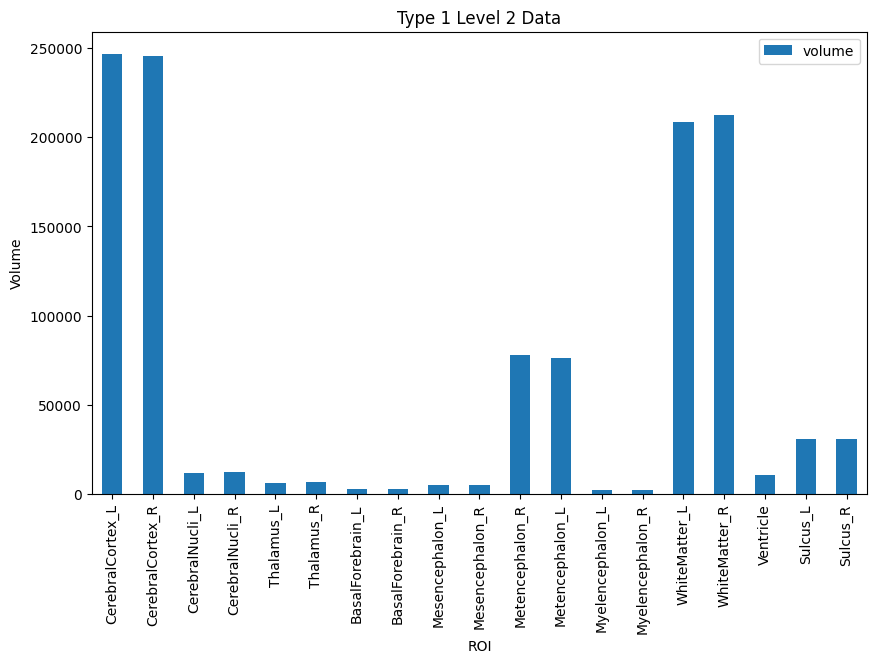

In [21]:
#bar plot by roi and volume of type 1 level 2

ax = type1_level2_df.plot.bar(x='roi', y='volume', figsize=(10, 6))
ax.set_title("Type 1 Level 2 Data")  # title
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("ROI")
plt.ylabel("Volume")
plt.show()


Create a donut chart of the Type 1 Level 3 data

In [22]:
# extract type 1 level 3 data
type1_level3_df = kirby906a_ax_df[(kirby906a_ax_df["type"] == 1) & (kirby906a_ax_df["level"] == 3)]


In [23]:
type1_level3_summary = type1_level3_df.groupby("roi")["volume"].sum()

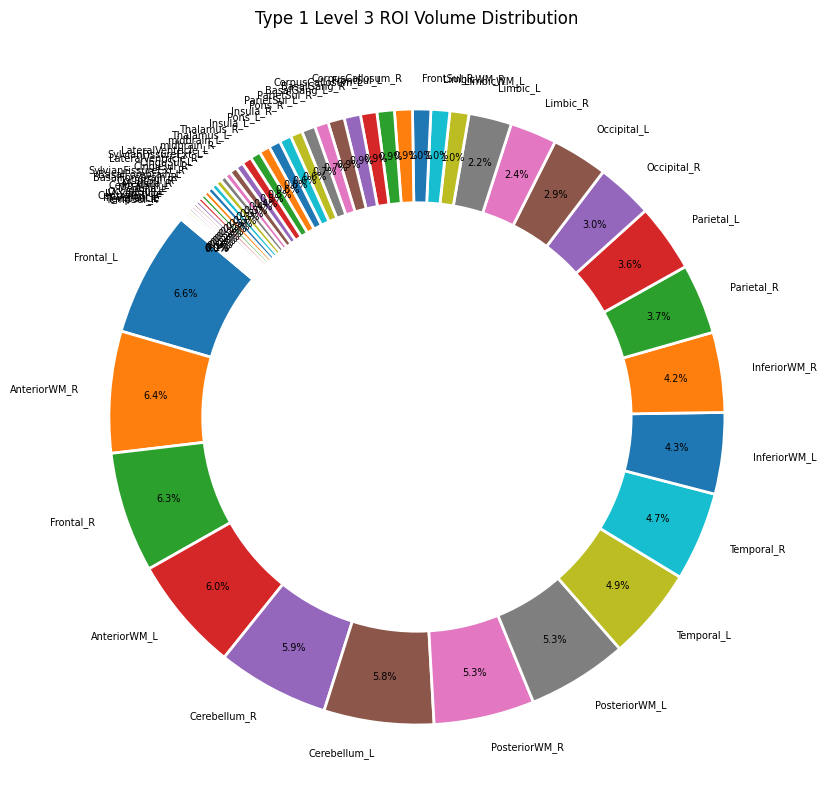

In [24]:
# Sort by volume and select the top regions to avoid clutter
type1_level3_summary = type1_level3_summary.sort_values(ascending=False)

# Create a donut chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    type1_level3_summary, labels=type1_level3_summary.index, autopct='%1.1f%%',
    startangle=140, wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    pctdistance=0.85, textprops={'fontsize': 8}  # Adjust label distance and font size
)

# Draw a circle in the center to make it a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Adjust text properties to prevent overlap
for text in texts:
    text.set_fontsize(7)  # Reduce font size of labels

for autotext in autotexts:
    autotext.set_fontsize(7)  # Reduce font size of percentage labels

# Add title
plt.title("Type 1 Level 3 ROI Volume Distribution", fontsize=12)

# Show the plot
plt.show()


Read in the class data from here https://github.com/bcaffo/ds4bme/blob/master/data/classInterests.txt. Name it "class_interests_df". Create a single bar plot of student counts by year and program using seaborn.

In [25]:
#Load the data
url = 'https://raw.githubusercontent.com/bcaffo/ds4bme/master/data/classInterests.txt'
class_interests_df = pd.read_csv(url, sep=r'\s+')

In [26]:
class_interests_df.head(4)

,Year,Program
0,Master's,BME
1,Master's,BME
2,Senior,BME
3,PhD,BME


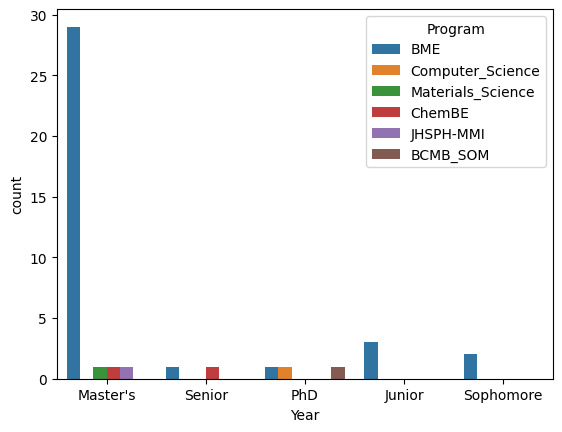

In [27]:
#Create single bar plot of student counts by year and program
sns.countplot(data=class_interests_df, x='Year', hue='Program')
plt.show()

Download the gene expression dataset. Name it "gene_expression_df"

In [28]:
gene_expression_df = pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/GSE5859_exprs.csv", index_col=0)
gene_expression_df.head(4)


,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
1007_s_at,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,5.810930,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1053_at,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,6.666625,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410
117_at,5.760106,4.825169,5.039387,5.414160,5.205697,5.300078,5.099337,5.156459,5.736109,5.807496,...,6.231457,5.240717,5.275062,5.759827,5.409720,5.491938,5.113570,5.401876,5.537605,5.247190
121_at,6.935451,7.025210,7.543667,7.959781,7.223323,8.006816,8.102504,7.434617,7.532321,7.711461,...,8.215096,7.677593,7.923624,7.219401,7.432338,6.785174,7.833862,7.607461,7.302935,7.331864


In [29]:
#1) subtract the rowmean from each row
gene_expression_df_pt1 = gene_expression_df.sub(gene_expression_df.mean(axis=1), axis=0)
gene_expression_df_pt1.head(4)


,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
1007_s_at,-0.049313,-0.647073,-0.226509,0.129747,-0.322250,0.123230,0.480163,-0.013618,0.263058,-0.572333,...,0.699373,-0.067397,0.626902,0.076844,-0.260908,-0.052949,0.243751,-0.250195,0.036180,0.105316
1053_at,0.163992,0.308363,0.400337,-0.085507,0.159365,-0.009050,-0.249394,-0.043143,-0.049269,-0.425005,...,-0.491913,0.321100,0.182799,-0.162988,0.077152,0.144017,-0.152446,0.189150,-0.739855,0.425779
117_at,0.283074,-0.651863,-0.437645,-0.062873,-0.271335,-0.176954,-0.377696,-0.320573,0.259077,0.330464,...,0.754425,-0.236315,-0.201970,0.282794,-0.067313,0.014905,-0.363462,-0.075156,0.060573,-0.229842
121_at,-0.648591,-0.558832,-0.040375,0.375740,-0.360718,0.422774,0.518462,-0.149425,-0.051720,0.127419,...,0.631054,0.093552,0.339583,-0.364641,-0.151704,-0.798867,0.249820,0.023419,-0.281107,-0.252178


In [30]:
#2) take the resulting matrix and subtract the column mean from each column
gene_expression_df_pt2 = gene_expression_df_pt1.sub(gene_expression_df_pt1.mean(axis=0), axis=1)
gene_expression_df_pt2.head(4)

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
1007_s_at,-0.024490,-0.640032,-0.223988,0.114936,-0.428929,0.109485,0.457383,-0.017008,0.250137,-0.462337,...,0.678049,-0.061456,0.665913,0.076758,-0.251423,-0.031388,0.235241,-0.261128,0.041275,0.090015
1053_at,0.188815,0.315404,0.402858,-0.100318,0.052687,-0.022794,-0.272174,-0.046533,-0.062190,-0.315009,...,-0.513237,0.327042,0.221810,-0.163074,0.086637,0.165579,-0.160956,0.178217,-0.734760,0.410478
117_at,0.307897,-0.644822,-0.435124,-0.077684,-0.378014,-0.190699,-0.400475,-0.323963,0.246157,0.440460,...,0.733100,-0.230374,-0.162959,0.282708,-0.057828,0.036467,-0.371972,-0.086090,0.065668,-0.245143
121_at,-0.623768,-0.551790,-0.037853,0.360928,-0.467397,0.409030,0.495682,-0.152814,-0.064641,0.237415,...,0.609730,0.099493,0.378593,-0.364727,-0.142219,-0.777306,0.241310,0.012486,-0.276012,-0.267479


In [31]:
#3) take the resulting matrix and divide each column by the columns stdev
gene_expression_df_pt3 = gene_expression_df_pt2.div(gene_expression_df_pt2.std(axis=0), axis=1)
gene_expression_df_pt3.head(4)

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
1007_s_at,-0.062810,-1.694428,-0.797346,0.362538,-1.152413,0.366177,1.252187,-0.054154,1.008166,-0.730639,...,1.446603,-0.185273,1.615970,0.245537,-0.568262,-0.069236,0.617954,-0.598607,0.088393,0.257410
1053_at,0.484259,0.835005,1.434085,-0.316432,0.141554,-0.076237,-0.745136,-0.148166,-0.250652,-0.497815,...,-1.094982,0.985940,0.538265,-0.521649,0.195814,0.365237,-0.422815,0.408542,-1.573530,1.173822
117_at,0.789673,-1.707110,-1.548943,-0.245036,-1.015618,-0.637799,-1.096388,-1.031533,0.992122,0.696068,...,1.564055,-0.694512,-0.395453,0.904341,-0.130702,0.080440,-0.977132,-0.197351,0.140632,-0.701024
121_at,-1.599798,-1.460817,-0.134750,1.138467,-1.255766,1.368016,1.357039,-0.486577,-0.260531,0.375192,...,1.300847,0.299944,0.918732,-1.166704,-0.321440,-1.714599,0.633897,0.028623,-0.591095,-0.764897


Download the data and name it 'healthcare_df'

In [32]:
healthcare_df = pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv", skiprows=2, index_col=0)
healthcare_df.head(4)

,1991__Total Health Spending,1992__Total Health Spending,1993__Total Health Spending,1994__Total Health Spending,1995__Total Health Spending,1996__Total Health Spending,1997__Total Health Spending,1998__Total Health Spending,1999__Total Health Spending,2000__Total Health Spending,...,2005__Total Health Spending,2006__Total Health Spending,2007__Total Health Spending,2008__Total Health Spending,2009__Total Health Spending,2010__Total Health Spending,2011__Total Health Spending,2012__Total Health Spending,2013__Total Health Spending,2014__Total Health Spending
Location,,,,,,,,,,,,,,,,,,,,,
United States,675896.0,731455.0,778684.0,820172.0,869578.0,917540.0,969531.0,1026103.0,1086280.0,1162035.0,...,1696222.0,1804672.0,1918820.0,2010690.0,2114221.0,2194625.0,2272582.0,2365948.0,2435624.0,2562824.0
Alabama,10393.0,11284.0,12028.0,12742.0,13590.0,14450.0,15462.0,15860.0,16451.0,17504.0,...,25338.0,26638.0,27700.0,28765.0,30095.0,30728.0,31398.0,32848.0,33788.0,35263.0
Alaska,1458.0,1558.0,1661.0,1728.0,1879.0,2076.0,2240.0,2386.0,2569.0,2867.0,...,4765.0,5048.0,5426.0,5807.0,6112.0,6519.0,6928.0,7406.0,7684.0,8151.0
Arizona,9269.0,9815.0,10655.0,11364.0,12042.0,12850.0,13418.0,14465.0,15550.0,16646.0,...,28190.0,30766.0,33366.0,35547.0,37258.0,38620.0,39295.0,40495.0,41481.0,43356.0


In [ ]:
#reset index to treat state as column
healthcare_df = healthcare_df.reset_index()

#transform to long format
healthcare_long_df = healthcare_df.melt(id_vars=["Location"], var_name="Year", value_name="Spending")



In [ ]:
print("Data types before extraction:", healthcare_long_df.dtypes)


Data types before extraction: Location     object
Year         object
Spending    float64
dtype: object


In [ ]:
# String values before extraction
healthcare_long_df["Year"] = healthcare_long_df["Year"].astype(str)

#Extract only the year values
healthcare_long_df["Year"] = healthcare_long_df["Year"].str.extract(r'(\d{4})')


# Convert Year to numeric
healthcare_long_df["Year"] = pd.to_numeric(healthcare_long_df["Year"], errors='coerce')

In [ ]:

# Rename "Location" column to "State"
healthcare_long_df.rename(columns={"Location": "State"}, inplace=True)

healthcare_long_df.head(4)


,State,Year,Spending
0,United States,1991,675896.0
1,Alabama,1991,10393.0
2,Alaska,1991,1458.0
3,Arizona,1991,9269.0


In [ ]:
#Only look at states:
valid_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia",
    "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire",
    "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota",
    "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
    "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia",
    "Washington", "West Virginia", "Wisconsin", "Wyoming"
]


selected_states = healthcare_long_df[healthcare_long_df["State"].isin(valid_states)]
selected_states.head()

,State,Year,Spending
1,Alabama,1991,10393.0
2,Alaska,1991,1458.0
3,Arizona,1991,9269.0
4,Arkansas,1991,5632.0
5,California,1991,81438.0


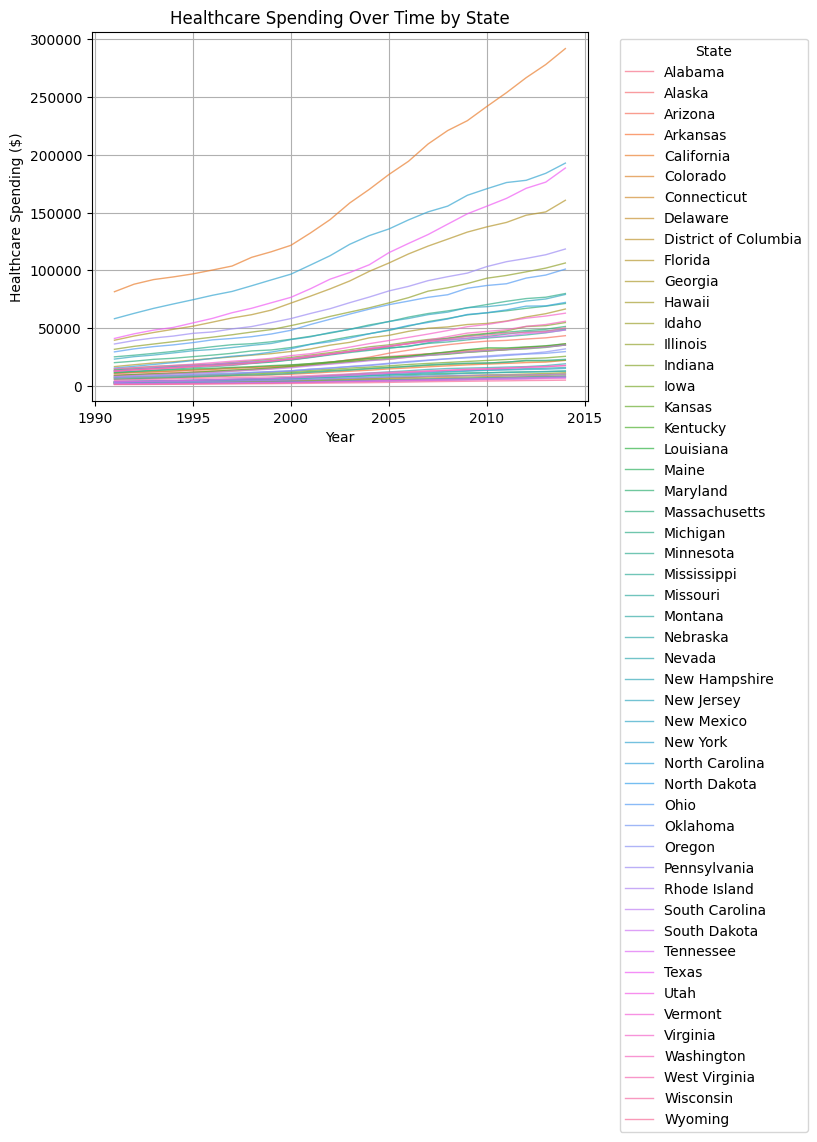

In [ ]:
#Create plot of healthcare spending vs time color coded by state
sns.lineplot(data=selected_states, x="Year", y="Spending", hue="State", alpha=0.7, linewidth=1)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Healthcare Spending ($)")
plt.title("Healthcare Spending Over Time by State")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Adjust legend position
plt.grid(True)
plt.show()

Create a barplot using matplotlib of average health care spending by state.


In [ ]:

# Compute the average healthcare spending per state
avg_spending_by_state = selected_states.groupby("State")["Spending"].mean().sort_values()
avg_spending_by_state

,Spending
State,
Wyoming,2655.041667
Vermont,3513.541667
North Dakota,3816.541667
Alaska,4141.541667
South Dakota,4153.750000
Montana,4614.750000
District of Columbia,4738.291667
Delaware,5167.416667
Idaho,6042.958333


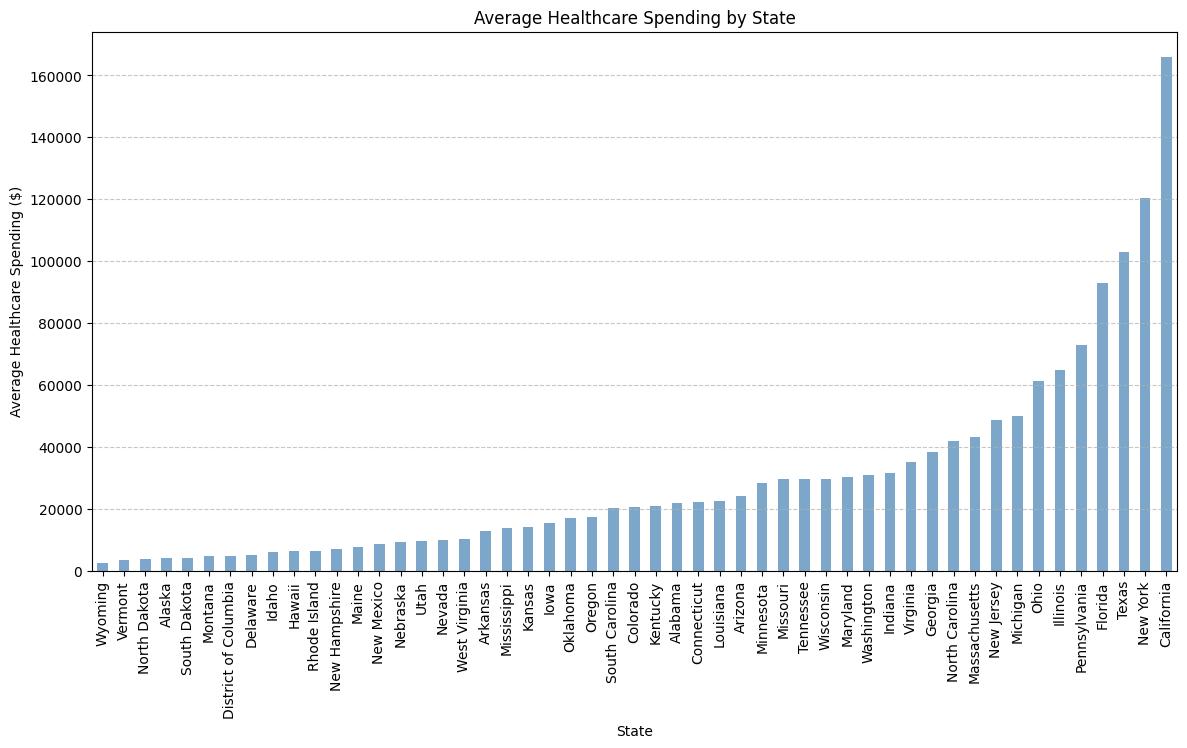

In [ ]:
#Create bar plot using matplotlib
plt.figure(figsize=(14, 7))
avg_spending_by_state.plot(kind='bar', color='steelblue', alpha=0.7)

# Customize the plot
plt.xlabel("State")
plt.ylabel("Average Healthcare Spending ($)")
plt.title("Average Healthcare Spending by State")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()